"""
In this example you will run a crude, sample based t-test.

The code below opens the file "Hypothesis_test_data.jld2". The resulting variable "data"
contains 100 numbers. Your job is to determine whether their mean is different from 0.
We're going to do this with a sampling based appraoch. Here is what you should do.

1) Calculate the sample variance of the data: σ_sample.
2) Create a function that builds a Normal distribution with μ=0 and σ = σ_sample. 
   So you will now have a normal distribution N(0,σ_sample).
   Since our data set is size 'n=100', sample 100 points from this normal distribution.
   Calculate the sample mean of these 100 data points.
3) This sample mean will be the output of this function. This is a single number.

Now call this function 10_000 times to generate 10_000 sample means. Plot a histogram 
of these distributions. This is the distribution of possible sample means you can expect
to get from N(0,σ_sample) if you only draw 100 data points.

Now compare this distribution to the sample mean of the data you loaded.
What can you conclude?

For this question, you should 1) produce the histogram of sample means and 2) at the end
of your code, verbally answer the question I pose above.

Congradulations, you just ran a t-test!

"""

In [3]:
import Pkg
using Pkg
Pkg.add("JLD2")
Pkg.add("PlotlyJS")
Pkg.add("Plots")
import Pkg;
Pkg.add("load")Pkg.instantiate()
Pkg.status()



   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Pkg.Types.PkgError: The following package names could not be resolved:
 * load (not found in project, manifest or registry)
[36m   Suggestions:[39m [0m[1mL[22m[0m[1mo[22m[0m[1ma[22m[0m[1md[22mFlint [0m[1mL[22m[0m[1mo[22m[0m[1ma[22m[0m[1md[22mAllPackages [0m[1mL[22m[0m[1mo[22m[0m[1ma[22m[0m[1md[22mTensorDecompositions

In [5]:
using Random
using Plots
using Distributions
using JLD2
using load
using PlotlyJS

Random.seed!(1234); 

ArgumentError: ArgumentError: Package load not found in current path.
- Run `import Pkg; Pkg.add("load")` to install the load package.

In [13]:
data_load = load("Hypothesis_test_data.jld2");
data = data_load["data"]

n = length(data);

μ_null = 0.0;
sample_σ = std(data, corrected=true);
mean(data)

0.4982426174345831

In [8]:
function single_sample_mean(n,μ_null,sample_σ)
    dist = Normal(μ_null, sample_σ)
    sample_dist = rand(dist, n)
    sample_mean = mean(sample_dist)

    return sample_mean
end

single_sample_mean (generic function with 1 method)

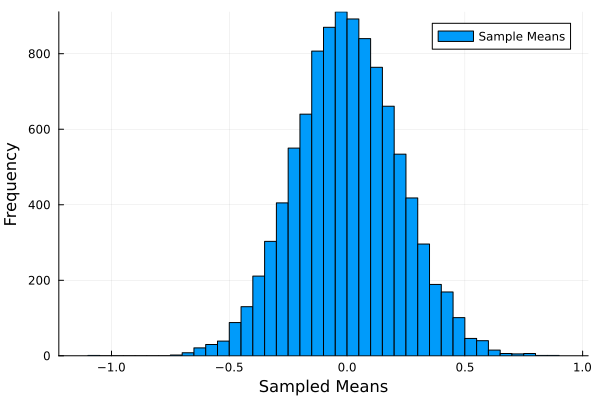

In [12]:
## Loop over nrep random experiments and calculate nrep sample means
nrep = 10_000;
means_keep = zeros(nrep); # Fill in this vector with 10_000 sample means
for i in 1:nrep
     means_keep[i] = single_sample_mean(n,μ_null,sample_σ)

end

histogram(means_keep, label = "Sample Means", xlabel = " Sampled Means ", ylabel = "Frequency" ) # This does the plotting






In [12]:
"""
What do you conclude? Write this here.
 
 The mean of the data we loaded is coming from the sampled means distribution, it means that the data is coming from the null hypothesis distribution. So, we can't reject the null hypothesis.
"""